In [1]:
import pandas as pd
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the CSV file
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\AMZN_historical_data.csv')
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [3]:
# Remove rows with NaN values from all columns
df_cleaned = df.dropna()

# Save the cleaned data to a new CSV file
df_cleaned.to_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\AMZN_historical_data_cleaned.csv', index=False)

# Load the cleaned data
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\AMZN_historical_data_cleaned.csv')

# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days

# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], 
                                                               fastperiod=12, 
                                                               slowperiod=26, 
                                                               signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()

# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])

           Close         SMA        RSI      MACD  MACD_Signal  MACD_Hist
200     0.298958    0.176832  57.425891  0.015805     0.010999   0.004806
201     0.305990    0.177930  57.647014  0.016253     0.012050   0.004203
202     0.312500    0.179065  57.850698  0.016938     0.013028   0.003910
203     0.319792    0.180255  58.077664  0.017863     0.013995   0.003868
204     0.347917    0.181638  58.934835  0.020628     0.015321   0.005306
...          ...         ...        ...       ...          ...        ...
6841  180.830002  166.764500  53.223683 -1.342010     0.635114  -1.977124
6842  179.850006  167.023950  53.097488 -1.878483     0.132395  -2.010878
6843  182.500000  167.295150  53.397779 -2.065994    -0.307283  -1.758711
6844  183.199997  167.563750  53.476854 -2.133520    -0.672530  -1.460990
6845  181.710007  167.813150  53.283438 -2.280971    -0.994218  -1.286753

[6646 rows x 6 columns]


In [5]:
# Display the first few rows of the DataFrame
print("Historical Data:")
print(df.head())

Historical Data:
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [12]:
# Create a Ticker object for AMZN
ticker = yf.Ticker("AMZN")

In [13]:
# Get financial statements
financials = ticker.financials
print("\nFinancials:")
print(financials)


Financials:
                                                          2023-12-31  \
Tax Effect Of Unusual Items                         211380035.679101   
Tax Rate For Calcs                                          0.189579   
Normalized EBITDA                                      88287000000.0   
Total Unusual Items                                     1115000000.0   
Total Unusual Items Excluding Goodwill                  1115000000.0   
Net Income From Continuing Operation Net Minori...     30425000000.0   
Reconciled Depreciation                                48663000000.0   
Reconciled Cost Of Revenue                            480980000000.0   
EBITDA                                                 89402000000.0   
EBIT                                                   40739000000.0   
Net Interest Income                                     -233000000.0   
Interest Expense                                        3182000000.0   
Interest Income                                    

In [14]:
# Get the balance sheet
balance_sheet = ticker.balance_sheet
print("\nBalance Sheet:")
print(balance_sheet)


Balance Sheet:
                                                        2023-12-31  \
Treasury Shares Number                                 515000000.0   
Ordinary Shares Number                               10383000000.0   
Share Issued                                         10898000000.0   
Net Debt                                                       NaN   
Total Debt                                          135611000000.0   
Tangible Book Value                                 171399000000.0   
Invested Capital                                    260189000000.0   
Working Capital                                       7434000000.0   
Net Tangible Assets                                 171399000000.0   
Capital Lease Obligations                            77297000000.0   
Common Stock Equity                                 201875000000.0   
Total Capitalization                                260189000000.0   
Total Equity Gross Minority Interest                201875000000.0   
Stoc

In [15]:
# Get the cash flow statement
cash_flow = ticker.cashflow
print("\nCash Flow Statement:")
print(cash_flow)


Cash Flow Statement:
                                                   2023-12-31     2022-12-31  \
Free Cash Flow                                  32217000000.0 -16893000000.0   
Repurchase Of Capital Stock                               0.0  -6000000000.0   
Repayment Of Debt                              -33737000000.0 -46753000000.0   
Issuance Of Debt                                18129000000.0  62719000000.0   
Capital Expenditure                            -52729000000.0 -63645000000.0   
Interest Paid Supplemental Data                  3112000000.0   2142000000.0   
Income Tax Paid Supplemental Data               11179000000.0   6035000000.0   
End Cash Position                               73890000000.0  54253000000.0   
Beginning Cash Position                         54253000000.0  36477000000.0   
Effect Of Exchange Rate Changes                   403000000.0  -1093000000.0   
Changes In Cash                                 19234000000.0  18869000000.0   
Financing Cash Flo

In [4]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' as the index
df.set_index('Date', inplace=True)

In [5]:
# Calculate Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()  # 20-day moving average
df['MA50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average

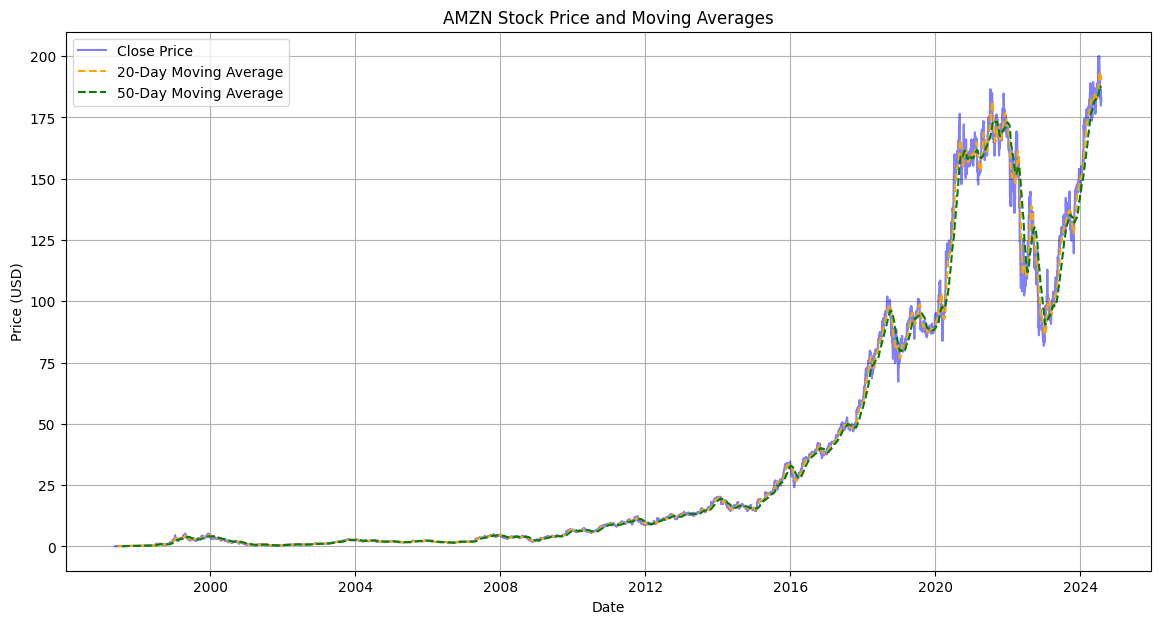

In [6]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['MA20'], label='20-Day Moving Average', color='orange', linestyle='--')
plt.plot(df['MA50'], label='50-Day Moving Average', color='green', linestyle='--')

plt.title('AMZN Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()